# analysis

In [1]:
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [2]:
df_proc = pd.read_csv('../data/processed.csv')
df_pred = pd.read_csv('../data/scores_2022_1_8.csv', index_col=0)

df = df_proc.merge(df_pred, on='input_name', how='inner')

df

,input_name,igdb_id,steam_id,personal_rating,feat_rating,feat_popularity,feat_tags_1980s,feat_tags_1990's,feat_tags_2.5D,feat_tags_2D,...,feat_emb_text_759,feat_emb_text_760,feat_emb_text_761,feat_emb_text_762,feat_emb_text_763,feat_emb_text_764,feat_emb_text_765,feat_emb_text_766,feat_emb_text_767,predicted_rating
0,Internet Cafe Simulator 2,NaN,1563180.0,NaN,73,0.09,0,0,0,0,...,0.036431,-0.005987,0.010897,-0.003835,-0.007820,-0.006116,-0.001961,0.016175,-0.015337,3.602125
1,You Will (Not) Remain,186483.0,1776160.0,NaN,98,0.09,0,0,1,0,...,-0.046469,-0.012982,-0.005062,-0.032851,-0.042626,0.032410,-0.017440,-0.031375,-0.036576,4.856446
2,VenusBlood HOLLOW International,186513.0,1788780.0,NaN,90,0.05,0,0,0,1,...,0.003919,-0.007668,0.021574,-0.019056,-0.039719,-0.001227,-0.011749,0.002420,-0.026994,4.008447
3,Electrician Simulator - First Shock,186506.0,1781160.0,NaN,88,0.13,0,0,0,0,...,-0.013033,0.057159,-0.011181,0.014731,-0.004543,-0.003837,-0.014539,-0.011641,-0.008448,4.052474
4,Moon Farming - Prologue,NaN,1662060.0,NaN,90,0.09,0,0,0,0,...,0.011619,0.015207,-0.005377,0.026900,-0.026705,-0.010935,-0.000841,0.003758,-0.003834,4.754367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,Pavlov VR,30548.0,555160.0,NaN,94,0.82,0,0,0,0,...,0.013997,-0.045655,-0.015134,0.005892,0.002749,0.017412,0.003657,0.015536,0.014168,4.377280
2619,Monster Rancher 1 & 2 DX,165816.0,1716120.0,NaN,88,0.20,0,0,0,0,...,0.026895,0.009931,0.043239,0.029045,-0.034361,-0.018281,0.026172,0.024514,-0.011014,4.615522
2620,Looney Tunes B-Ball,42585.0,NaN,NaN,69,0.27,0,0,0,0,...,0.022112,-0.027428,0.004368,0.015708,0.029758,0.001735,0.000833,0.011205,0.021694,3.643793
2621,EA Play,NaN,1289670.0,NaN,0,0.07,0,0,0,0,...,-0.018970,0.004657,-0.036765,-0.022326,0.017543,-0.009065,-0.001939,-0.050364,-0.019049,3.172609


In [34]:
df_pred.head(25)

,input_name,predicted_rating
710,Black Mesa,6.103370
365,Half-Life 2: Episode Two,6.000501
1218,Thief II: The Metal Age,5.998801
362,Half-Life 2,5.980977
2020,NieR RepliCant,5.971914
574,The Elder Scrolls IV: Oblivion,5.940894
754,Half-Life: Alyx,5.929329
1212,The Elder Scrolls IV: Oblivion - Game of the Y...,5.928569
844,The Forgotten City,5.916336
2268,Persona 5 Royal,5.852408


In [3]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

w_p = [(name, weight, pvalue) for (name, weight), (_, pvalue) in zip(results.params.items(), results.pvalues.items())]
w_p_sorted = sorted(w_p, key=lambda x: x[2])

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       predicted_rating   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     6.087
Date:                Sun, 09 Jan 2022   Prob (F-statistic):          3.46e-218
Time:                        00:21:52   Log-Likelihood:                -186.18
No. Observations:                2623   AIC:                             2716.
Df Residuals:                    1451   BIC:                             9598.
Df Model:                        1171                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        2.8670      0.534      5.372      0.000       1.820       3.914
feat_rating                                                  0.0204      0.001     38.168      0.000       0.019       0.021
feat_popularity                                              0.0567      0.050      1.141      0.254      -0.041       0.154
feat_tags_1980s                                             -0.0019      0.190     -0.010      0.992      -0.374       0.370
feat_tags_1990's                                            -0.0623      0.122     -0.513      0.608      -0.301       0.176
feat_tags_2.5D                                              -0.0885      0.140     -0.632      0.527      -0.363       0.186
feat_tags_2D                                                -0.0928      0.068     -1.356      0.175      -0.227       0.041
feat_tags_2D Fighter                                        -0.4909      0.340     -1.444      0.149      -1.158       0.176
feat_tags_2D Platformer                                      0.1558      0.161      0.969      0.333      -0.160       0.471
feat_tags_3D                                                 0.0496      0.080      0.622      0.534      -0.107       0.206
feat_tags_3D Fighter                                        -0.2259      0.378     -0.598      0.550      -0.967       0.515
feat_tags_3D Platformer                                      0.0444      0.162      0.274      0.784      -0.274       0.362
feat_tags_3D Vision                                         -0.1848      0.247     -0.748      0.455      -0.670       0.300
feat_tags_4 Player Local                                     0.0978      0.168      0.583      0.560      -0.231       0.427
feat_tags_4X                                                 0.1059      0.153      0.692      0.489      -0.194       0.406
feat_tags_4X (explore, expand, exploit, and exterminate)     0.2380      0.135      1.759      0.079      -0.027       0.504
feat_tags_6DOF                                              -0.1225      0.297     -0.412      0.680      -0.705       0.460
feat_tags_Abstract                                          -0.0352      0.296     -0.119      0.905      -0.616       0.545
feat_tags_Action                                             0.1744      0.025      6.987      0.000       0.125       0.223
feat_tags_Action RPG                                        -0.1017      0.082     -1.241      0.215      -0.262       0.059
feat_tags_Action RTS                                        -0.7249      0.326     -2.226      0.026      -1.364      -0.086
feat_tags_Action Roguelike                                  -0.0764      0.156     

In [4]:
for col, weight, pvalue in w_p_sorted:
    if pvalue <= 0.05:
        print(f'{col}: {weight}, {pvalue}')

feat_rating: 0.020383730324040273, 2.808488752072016e-221
feat_tags_Adventure: 0.22209695206668667, 1.0443916498140377e-18
feat_tags_Fantasy: 0.24518586844626367, 1.083063420840146e-15
feat_tags_Action: 0.17436202255078967, 4.2713887463705566e-12
const: 2.866974280244065, 9.035087359211722e-08
feat_tags_Indie: -0.2214586067087626, 1.264443132749564e-06
feat_tags_Tactical: -0.21213740184864918, 1.7972596117045307e-05
feat_tags_Simulator: -0.16983760210720966, 2.3342106287607155e-05
feat_tags_Stealth: -0.23048897150443548, 0.00017306280273600555
feat_tags_Role-playing (RPG): -0.11805707733942258, 0.00026563526811127636
feat_tags_Isometric: -0.27514434067914273, 0.000310088950791322
feat_tags_Co-op: 0.22547173771521023, 0.0007317715506140267
feat_tags_Western: 0.7144453436757701, 0.0007332926560831328
feat_tags_Comedy: 0.1097055053156401, 0.0013828213199022206
feat_tags_Sport: 0.18112836032752588, 0.0018227114124574847
feat_tags_Violent: -0.22161012420093196, 0.0018301998821100732
feat_ta

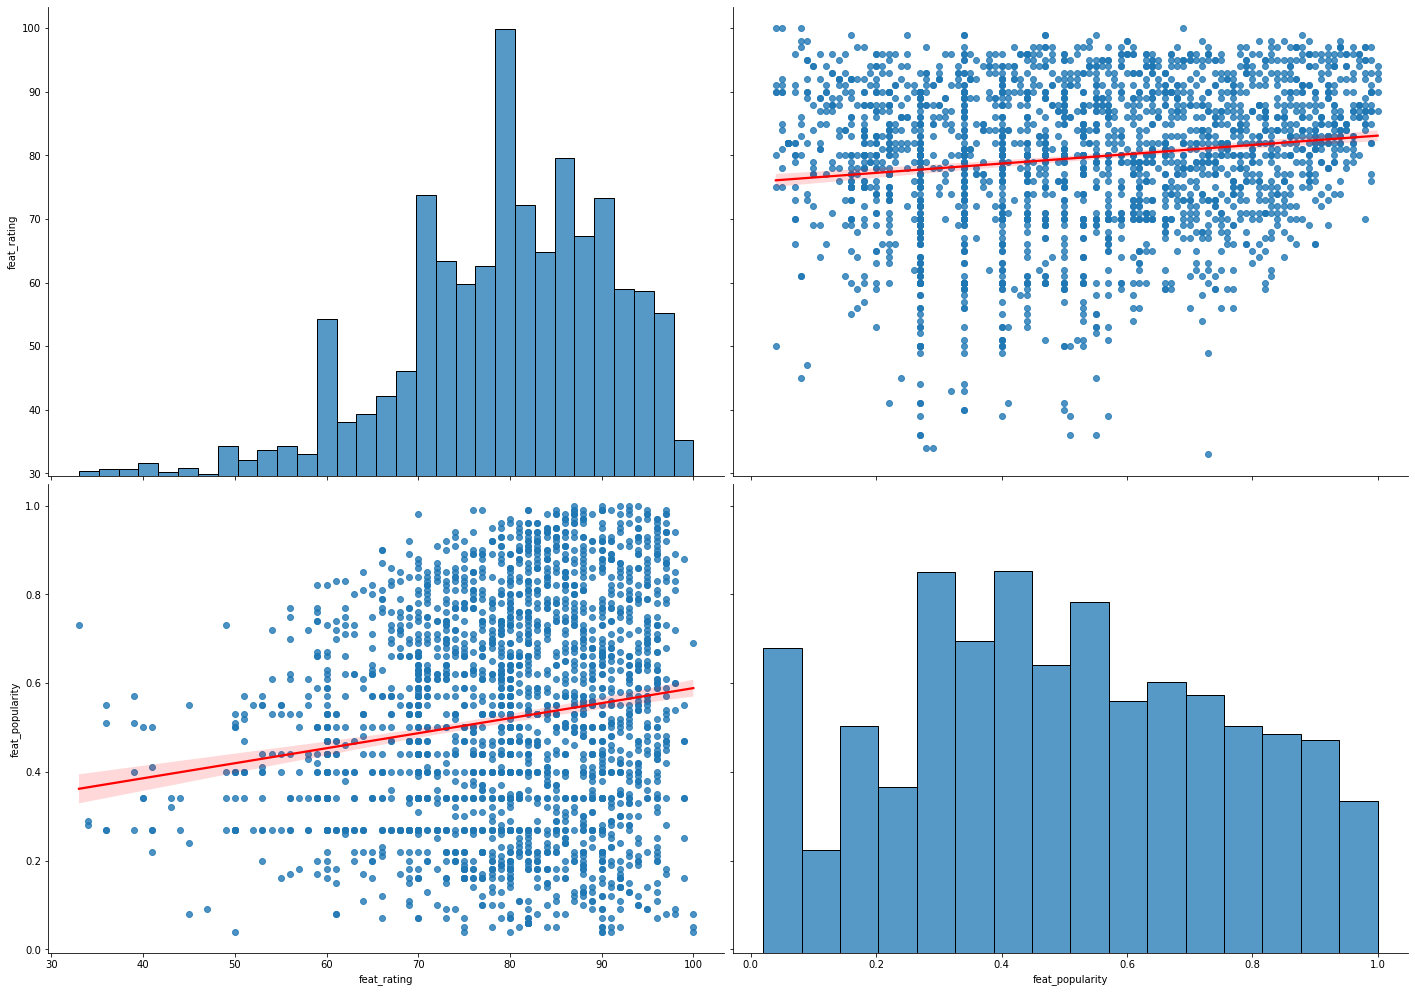

In [5]:
df_chart = df[['feat_rating', 'feat_popularity']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)

In [143]:
### SHAP

import scipy.stats as stats
import shap
from xgboost import XGBRegressor

cols = [col for col in df.columns if 'feat' in col]
X = df[cols]
y = df['predicted_rating']

model = XGBRegressor()
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [122]:
df_shap = pd.DataFrame(shap_values.values, columns=X.columns)

for col, imp in df_shap.abs().mean().sort_values(ascending=False)[:10].items():
    print(f'{col}: {imp:0.3f}')

feat_rating: 0.343
feat_tags_Singleplayer: 0.226
feat_tags_Tactical: 0.225
feat_tags_Action: 0.063
feat_tags_Adventure: 0.058
feat_tags_Indie: 0.057
feat_tags_Fantasy: 0.037
feat_tags_Strategy: 0.030
feat_tags_Simulator: 0.030
feat_tags_Role-playing (RPG): 0.026


In [170]:
corrs = []
for col in X.columns:
    corr, _ = stats.spearmanr(df[col], df_shap[col])
    corr = corr if not np.isnan(corr) else 0
    corrs.append((col, corr))

c_i = [(col, corr, df_shap[col].abs().mean()) for col, corr in corrs]
c_i = sorted(c_i, key=lambda x: x[1]*x[2], reverse=True)

# Top 10
for col, corr, shap_imp in c_i[:100]:
    if 'text' not in col:
        print(f'{col}: {corr:0.3f}//{shap_imp:0.3f}')
print()

# Bottom 10
for col, corr, shap_imp in c_i[-100:]:
    if 'text' not in col:
        print(f'{col}: {corr:0.3}//{shap_imp:0.3f}')

feat_rating: 0.976//0.343
feat_tags_Action: 0.818//0.063
feat_tags_Adventure: 0.861//0.058
feat_tags_Fantasy: 0.753//0.037
feat_popularity: 0.689//0.012
feat_tags_Sport: 0.342//0.007
feat_tags_Comedy: 0.467//0.005
feat_tags_Science fiction: 0.659//0.003
feat_tags_Horror: 0.447//0.003
feat_tags_Co-op: 0.451//0.003
feat_tags_Shooter: 0.608//0.002

feat_tags_Stealth: -0.328//0.003
feat_tags_Hack and slash/Beat 'em up: -0.329//0.003
feat_tags_Historical: -0.355//0.003
feat_tags_Great Soundtrack: -0.558//0.003
feat_tags_Turn-Based: -0.376//0.005
feat_tags_Survival: -0.473//0.006
feat_tags_Pixel Graphics: -0.383//0.008
feat_tags_2D: -0.486//0.007
feat_tags_Sandbox: -0.522//0.007
feat_tags_Simulation: -0.487//0.012
feat_tags_Tactical: -0.449//0.019
feat_tags_Singleplayer: -0.75//0.019
feat_tags_Simulator: -0.613//0.030
feat_tags_Role-playing (RPG): -0.786//0.026
feat_tags_Strategy: -0.713//0.030
feat_tags_Indie: -0.715//0.057


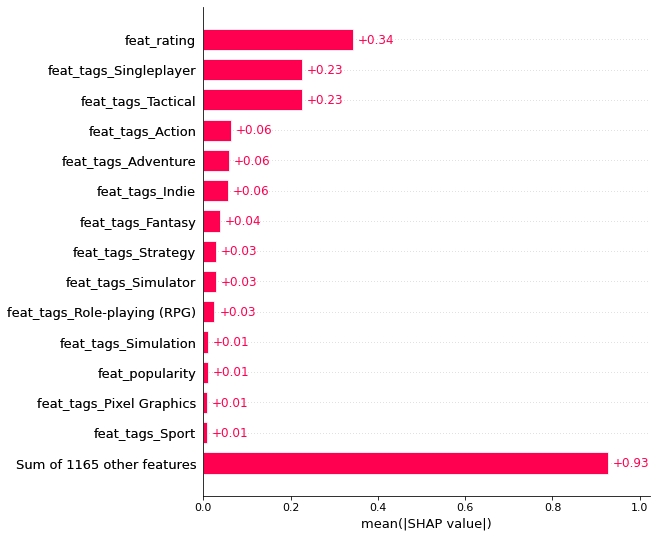

In [87]:
shap.plots.bar(shap_values, max_display=15)

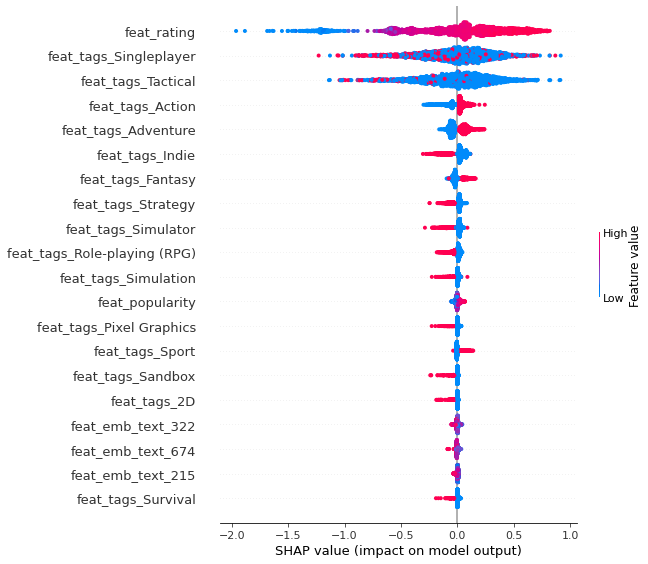

In [45]:
shap.summary_plot(shap_values, X)

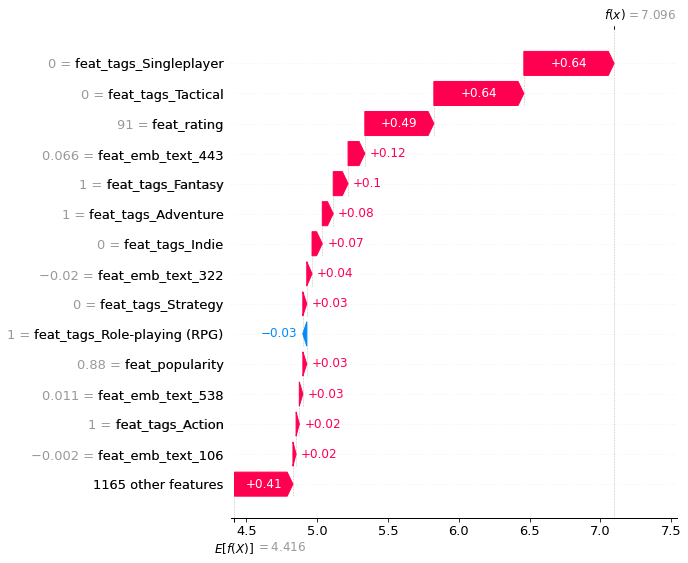

In [43]:
idx = df[df['input_name'] == 'The Legend of Zelda: Majora\'s Mask 3D'].index[0]
shap.plots.waterfall(shap_values[idx], max_display=15)

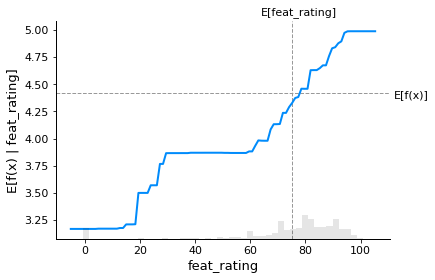

In [26]:
fig,ax = shap.partial_dependence_plot(
    "feat_rating", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
)

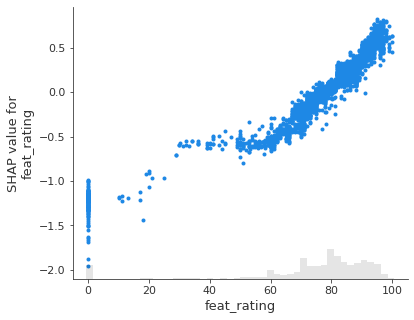

In [105]:
shap.plots.scatter(shap_values[:,"feat_rating"])

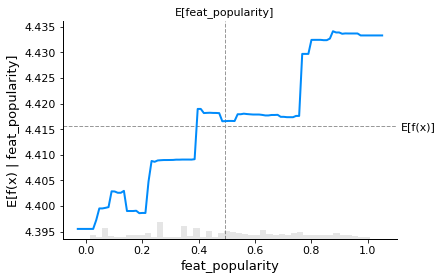

In [27]:
fig,ax = shap.partial_dependence_plot(
    "feat_popularity", model.predict, X, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

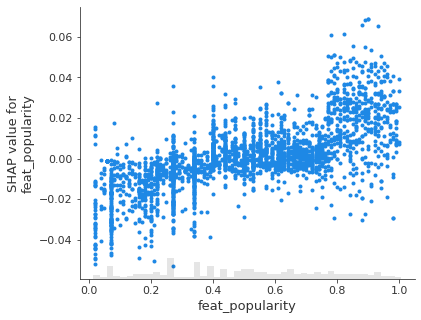

In [106]:
shap.plots.scatter(shap_values[:,"feat_popularity"])

# Insights
- Use stacked shap model. Not perfect but works
- Remove IGDB tags from model. they being fucky. 